# GARCH Model - Generalized Autoregressive Conditional Heteroskedasticity 

## GARCH is an approach to estimating the volatility of financial markets. Financial institutions use the model to estimate the return volatility of stocks, bonds, and other investment vehicles. Some investment experts believe we should focus on forecasting the return volatility as opposed to forecasting prices. According to them, there is more conclusive correlation information when analyzing volatility, while analysis of prices alone mostly exhibit random walk behavior.

In [1]:
import numpy as np
import pandas as pd
import arch as arch
from arch.__future__ import reindexing
from datetime import datetime

%matplotlib inline

In [2]:
# Read in stock historical prices and calculate daily return
stock_prices = pd.read_csv("../Resources/stock_historical_prices.csv", parse_dates=True, index_col="Date") 
stock_prices["Return"] = stock_prices["Adj Close"].pct_change() * 100
stock_prices.dropna(inplace=True)
stock_prices = stock_prices["2020":"2022"]

In [3]:
returns = stock_prices["Return"]
returns

Date
2020-01-02    0.935185
2020-01-03   -0.757215
2020-01-06    0.381506
2020-01-07   -0.281180
2020-01-08    0.532962
                ...   
2021-03-15    0.596360
2021-03-16   -0.126136
2021-03-17    0.340991
2021-03-18   -1.454969
2021-03-19   -0.185028
Name: Return, Length: 306, dtype: float64

In [4]:
from arch import arch_model
# The 'mean="Zero"' means that we're estimating a GARCH.
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)
# Fit the GARCH Model
results = model.fit(disp="off")
# Summarize the model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                      GARCH   Log-Likelihood:               -525.197
Distribution:                  Normal   AIC:                           1056.39
Method:            Maximum Likelihood   BIC:                           1067.56
                                        No. Observations:                  306
Date:                Fri, Apr 09 2021   Df Residuals:                      306
Time:                        21:58:30   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1378  5.441e-02      2.533  1.130e-02 [3.118e-02,  0.244]
alpha[1]       0.2905  7.802e-02      3.724  1.962e-04   [  0.138,  0.443]
beta[1]        0.6755  6.041e-02     11.182  4.998e-29   [  0.557,  0.794]
==========================================================================

Covariance estimator: robust
"""

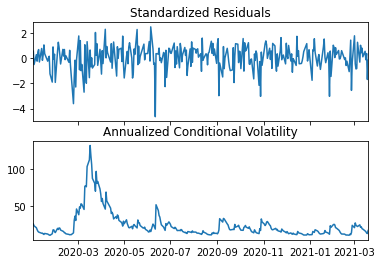

In [5]:
# Plot the model estimate of annualized volatility
annualized_vol = results.plot(annualize='D')

In [6]:
# Construct Volatility Forecasts for the next 3 days
forecast_horizon = 5

# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = results.forecast(start='03-19-21', horizon=forecast_horizon)
forecasts

In [7]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2021-03-19,15.833357,16.64098,17.385616,18.075885,18.718583


In [8]:
# The name of the column here is the date of the forecast.
# Each row represents the forecast of volatility for the following days.
# Transposing makes the forecast easier to plot
final = intermediate.dropna().T
final

Date,2021-03-19
h.1,15.833357
h.2,16.640980
h.3,17.385616
h.4,18.075885
h.5,18.718583


<AxesSubplot:>

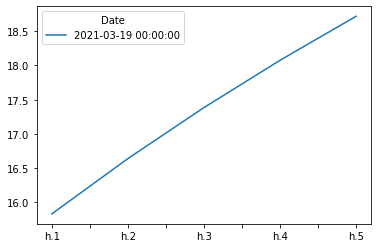

In [9]:
final.plot()